In [ ]:
#standard imports
#note xgboost here
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

In [ ]:
df = pd.read_csv("aca.csv",encoding="utf-8")
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
#data types
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [ ]:
df_set = df
#so i dont have to escape and can use single quotes
df_set = df_set.rename(columns = {'Daytime/evening attendance\t':"Daytime/evening attendance"})
df_set = df_set.rename(columns ={"Mother's qualification":"Mothers qualification"})
df_set = df_set.rename(columns ={"Father's qualification":"Fathers qualification"})
df_set = df_set.rename(columns ={"Mother's occupation":"Mothers occupation"})
df_set = df_set.rename(columns ={"Father's occupation":"Fathers occupation"})
df_set.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'

In [ ]:
#transform data: one-hot encode many of the variables
encoder = OneHotEncoder(sparse=False)
cat_cols = ['Marital status','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification',
            'Previous qualification (grade)','Nacionality','Mothers qualification','Fathers qualification','Mothers occupation',
            'Fathers occupation','Admission grade','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender',
            'Scholarship holder','Age at enrollment','International']

df_encoded = pd.DataFrame(encoder.fit_transform(df_set[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

df_set = df_set.drop(cat_cols, axis=1)
df_set = pd.concat([df_encoded, df_set], axis=1)

target_mapping = {'Graduate': 2, 'Enrolled': 1, 'Dropout': 0}
df_set['Target'] = df_set['Target'].replace(target_mapping)

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:


feature = df_set.drop('Target',axis=1) # Features (input variables)
target = df_set['Target'] # Target (output variable)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=target)

from imblearn.combine import SMOTEENN
import collections
counter = collections.Counter(y_train)
print('Before', counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample (X_train, y_train)
counter = collections.Counter (y_train_smenn)
print('After', counter)




Before Counter({2: 1767, 0: 1137, 1: 635})
After Counter({1: 1500, 0: 1144, 2: 696})


Results With Oversampling Smote + ENN
XGBoost Accuracy: 0.6937853107344633
Kappa Score: 0.5338058092770379
F1 Score: 0.6937853107344633
Recall: 0.6937853107344633
Precision: 0.6937853107344633


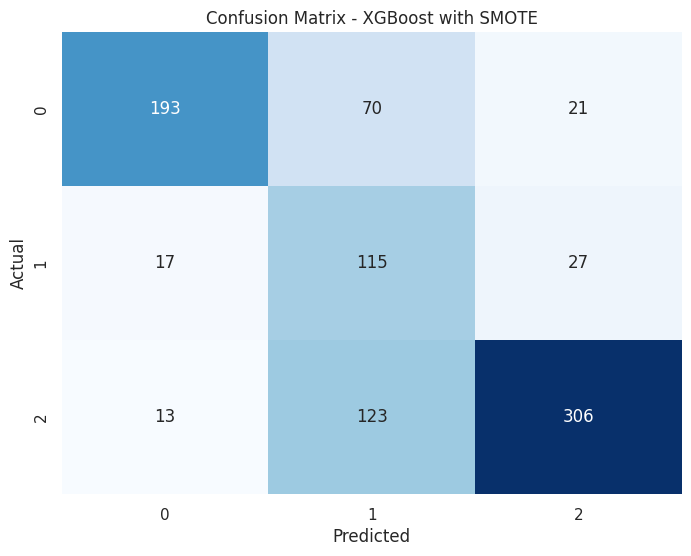

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=90, max_depth=4, n_jobs=-1, learning_rate=0.4, random_state=42)
xgb_classifier.fit(X_train_smenn, y_train_smenn)

# Make predictions using the model
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred,average='micro')

# Print the evaluation metrics
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

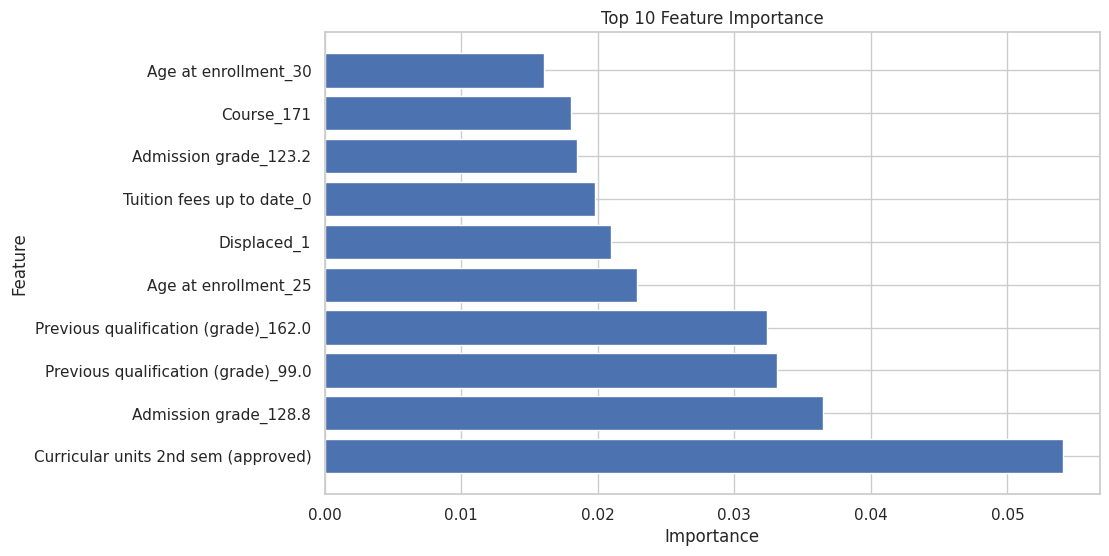

In [ ]:
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = feature_importance_df.head(10)

# Plot feature importances for the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

Results With Oversampling Smote + ENN
XGBoost Accuracy: 0.7649717514124293
Kappa Score: 0.6082228923996348
F1 Score: 0.7649717514124293
Recall: 0.7649717514124293
Precision: 0.7649717514124293


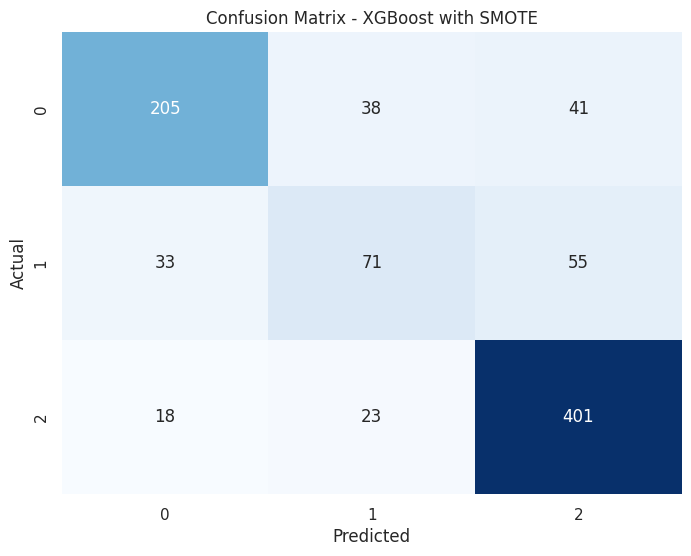

In [ ]:
#without oversampling
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=5, n_jobs=1, learning_rate=0.60, random_state=42)
xgb_classifier.fit(X_train, y_train)
# Make predictions using the model
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred,average='micro')

# Print the evaluation metrics
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate' : [0.1, 0.01, 0.05],
    'max_depth' : [3,4,5],
    'reg_lambda' : [0,1.0,10.0],
    'gamma': [0,0.25,1.0]
}



optimal_params = GridSearchCV (
    estimator = xgb.XGBClassifier(
        seed=42,
        subsample = 0.9,
        colsample_bytree = 0.5),
    param_grid = param_grid,
    scoring = 'f1_micro',
    verbose = True,
    return_train_score= True,
    cv=3,
    n_jobs = 10
)
optimal_params.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0]},
             return_train_score=True, scoring='f1_micro', verbose=True)

In [ ]:
optimal_params.cv_results_

{'mean_fit_time': array([ 5.63858843, 21.66924238, 22.66605282, 24.69914468, 27.04308327,
        27.00203252, 29.22401754, 29.47059266, 30.29912893, 27.73724063,
        28.59765593, 26.29439934, 29.27185678, 28.33388964, 31.06638169,
        32.69621468, 34.1654377 , 32.67077263, 24.46530549, 26.73589667,
        25.99361459, 30.00195185, 27.52205014, 26.36433983, 32.46183602,
        28.591676  , 34.40589746, 22.89651918, 24.39967068, 23.60296822,
        26.83419895, 27.38005479, 28.66775537, 28.34437656, 31.70171515,
        29.72699197, 25.79748201, 28.24307537, 25.42297498, 29.93466393,
        28.17322294, 29.33500719, 36.26590355, 34.87431574, 30.73207776,
        26.03914865, 26.96562719, 26.19715198, 28.603616  , 28.27770074,
        30.74040039, 30.47264743, 32.8702836 , 30.81140471, 23.53612073,
        26.30417315, 23.16154083, 27.52955548, 27.10255655, 25.36461234,
        28.0383931 , 26.29695741, 30.35875249, 26.43052491, 25.44320536,
        25.86380299, 29.70070704, 

In [ ]:
optimal_params.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:

#optimal params
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0}


In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            gamma=1.0,
                            learning_rate = 0.1,
                            max_depth = 5,
                            reg_lambda = 1.0,
                            subsample = 0.9,
                            colsample_bytree = 0.5)

clf_xgb.fit(X_train,
            y_train,
            verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:

y_pred2 = clf_xgb.predict(X_test)



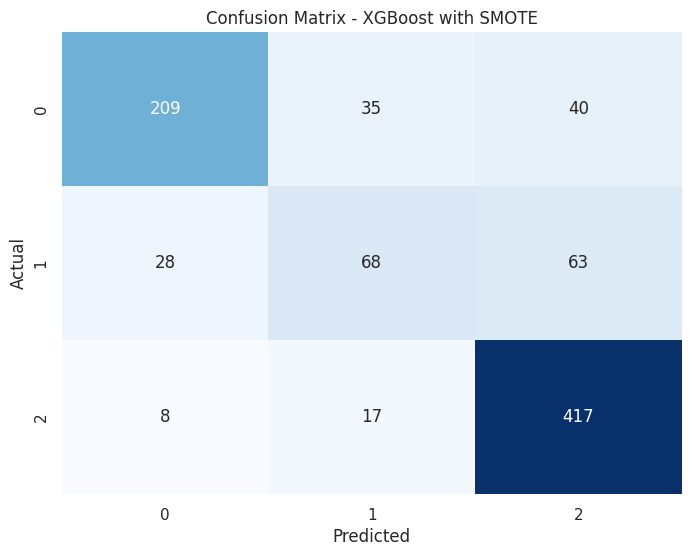

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.784180790960452

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid2 = {
    'learning_rate' : [0.1, 0.2, 0.3],
    'max_depth' : [5,6,7],
    'reg_lambda' : [0,1.0,10.0],
    'gamma': [1,2,3]
}



optimal_params2 = GridSearchCV (
    estimator = xgb.XGBClassifier(
        seed=42,
        subsample = 0.9,
        colsample_bytree = 0.5),
    param_grid = param_grid2,
    scoring = 'f1_micro',
    verbose = True,
    return_train_score= True,
    cv=3,
    n_jobs = -1
)
optimal_params2.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [1, 2, 3], 'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7], 'reg_lambda': [0, 1.0, 10.0]},
             return_train_score=True, scoring='f1_micro', verbose=True)

In [ ]:
print(optimal_params2.best_params_)

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0}


In [ ]:
clf2_xgb = xgb.XGBClassifier(seed=42,
                            gamma=1,
                            learning_rate = 0.3,
                            max_depth = 4,
                            reg_alpha = 9.0,
                            subsample = 0.9,
                            colsample_bytree = 0.5)

clf2_xgb.fit(X_train,
            y_train,
            verbose=True)

y_pred2_2 = clf2_xgb.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred2_2)
cm3

array([[207,  34,  43],
       [ 35,  56,  68],
       [ 11,  21, 410]])

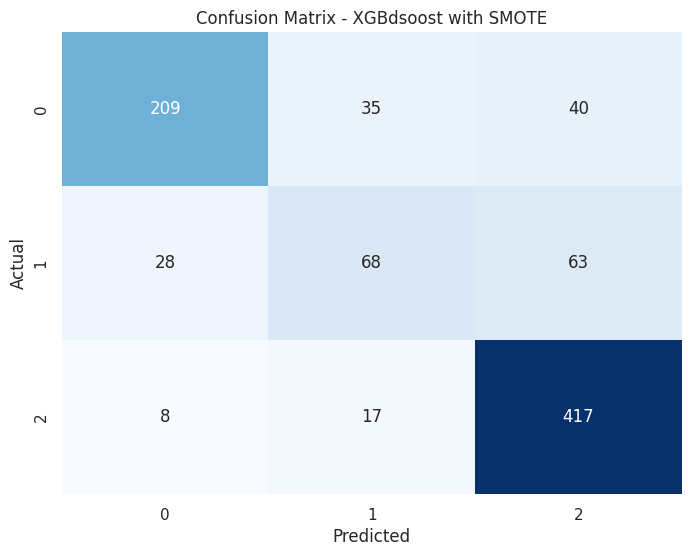

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32fd6ad5-d688-4e0a-9fc6-55e2a5bea8cc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>